<a href="https://colab.research.google.com/github/Kva-Ch/AI-Project/blob/main/AI%20Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p1>Training the Baye's Classifier<p1>

In [ ]:
import nltk
from pandas import DataFrame as df
import pandas as pd
from collections import defaultdict
content = ["[02/07/2017, 5:47:33 pm] Person_1: Hey there! This is the first message",
 "[02/07/2017, 5:48:24 pm] Person_1: This is the second message",
 "[02/07/2017, 5:48:44 pm] Person_1: Third…",
 "[02/07/2017, 8:10:52 pm] Person_2: Hey Person_1! This is the fourth message",
 "[02/07/2017, 8:14:11 pm] Person_2: Fifth …etc"]
ppl=defaultdict(list)

for line in content:
    try:
        person = line.split(':')[2][7:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[3:]))
        ppl[person].extend(text)   # If key exists (person), extend list with value (text),
                                   # if not create a new key, with value added to list
    except:
        print(line)  # in case reading a line fails, examine why
        pass
nltk.download('nps_chat')
nltk.download('punkt')
posts = nltk.corpus.nps_chat.xml_posts()

def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

fposts = [(extract_features(p.text), p.get('class')) for p in posts]
test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(classifier.classify(extract_features('Hi there!')))
print(classifier.classify(extract_features(input())))

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Greet


In [ ]:
f=open("/content/WhatsApp_Chat_with_Test_dataset.txt",'r')
content={}
for s in f.readlines():
	minus_find=s.index('-')+2
	try:
		colon_find=minus_find+s[minus_find:].index(":")
	except ValueError:
		continue
	# if 
	person_name=s[minus_find:colon_find]
	if person_name in content.keys():
		content[person_name].append(s[colon_find+1:])
	else:
		content[person_name]=[s[colon_find+1:]]
print(content)

{'KvaCh': [' Hey there\n', ' Third message test\n', ' Hello u there?\n', ' Okay cool!\n', " Yeah why won't i\n", " Don't you eat it\n", ' Are u a new born kid?\n', ' Nice to know\n', ' Will get u a nice juicy grass for your birthday\n', ' Hey there\n', ' Third message test\n', ' Hello u there?\n', ' Okay cool!\n', " Yeah why won't i\n", " Don't you eat it\n", ' Are u a new born kid?\n', ' Nice to know\n', ' Will get u a nice juicy grass for your birthday\n'], 'Shuruth@vce': [' hello this is 2nd messgae\n', ' yes i am there\n', ' i am fine\n', ' will you go to movie\n', ' will you eat food\n', ' who are you\n', ' where are you\n', ' what is your name\n', ' i dont eat food\n', ' i eat grass\n', ' i dont know no idea\n', ' hello this is 2nd messgae\n', ' yes i am there\n', ' i am fine\n', ' will you go to movie\n', ' will you eat food\n', ' who are you\n', ' where are you\n', ' what is your name\n', ' i dont eat food\n', ' i eat grass\n', ' i dont know no idea\n'], 'mathur': [' i am good\

{'Greet': [2, 0, 0], 'Statement': [6, 6, 4], 'Clarify': [2, 0, 0], 'whQuestion': [0, 6, 0], 'Emphasis': [2, 4, 0], 'ynQuestion': [4, 2, 0], 'nAnswer': [0, 2, 0], 'yAnswer': [2, 2, 0], 'Other': [0, 0, 0], 'Bye': [0, 0, 0], 'Emotion': [0, 0, 0], 'System': [0, 0, 0], 'Accept': [0, 0, 0], 'Continuer': [0, 0, 0]}


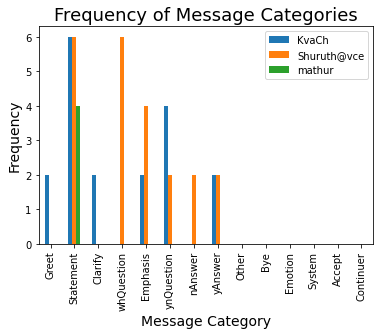

,KvaCh,Shuruth@vce,mathur
Greet,2,0,0
Statement,6,6,4
Clarify,2,0,0
whQuestion,0,6,0
Emphasis,2,4,0
ynQuestion,4,2,0
nAnswer,0,2,0
yAnswer,2,2,0
Other,0,0,0
Bye,0,0,0


In [ ]:
import matplotlib.pyplot as plt

categories=["Greet","Statement","Clarify","whQuestion","Emphasis","ynQuestion","nAnswer","yAnswer","Other","Bye","Emotion","System","Accept","Continuer"]
analysed_data={}
for i in categories:
  analysed_data[i]=[0 for i in range(len(content.keys()))]
for i in range(len(content.keys())):
  keys=list(content.keys())
  for s in content[keys[i]]:
    analysed_data[classifier.classify(extract_features(s))][i]+=1
print(analysed_data)

df= pd.DataFrame(analysed_data,index=list(content.keys()))
df=df.transpose()
ax=df.plot(kind="bar")
ax.set_title("Frequency of Message Categories", fontsize= 18)
ax.set_xlabel("Message Category", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.show()
display(df)